<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import tensorflow.

import tensorflow as tf

print(tf.__version__)

2.18.0


## Creating data to view and fit.

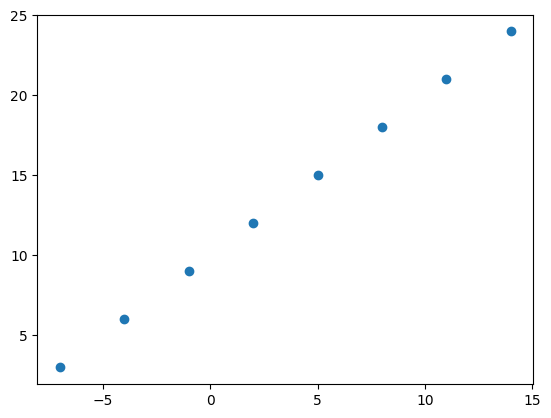

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Creat features.

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Crate the labels.

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it.
plt.scatter(X, y)

## Input and Output shapes.

In [3]:
# Create a demo tensor for our housing price.

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([99939])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([99939], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our numpy arrays into Tensors.

X = tf.constant(X, shape=(8, 1))
y = tf.constant(y, shape=(8, 1))

X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape


(TensorShape([1]), TensorShape([1]))

## Steps in Modelling in TensorFlow.

1. Creating a model - define the input and output layers, as welll as the hidden layers of a deep learning model.

2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is.

3. Fitting a model - Leting the model try to find patterns between x & y (features and labels)

In [7]:
## Set random seed.

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

])


# 2. Compile the model.
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model.
model.fit(
    X,
    y,
    epochs = 5
)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.2098 - mae: 14.2098
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 14.0773 - mae: 14.0773
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 13.9448 - mae: 13.9448
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 13.8123 - mae: 13.8123
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 13.6798 - mae: 13.6798


In [9]:
# Making a prediction.
model.predict([17.0])

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [25]:
# Let's see if we can make another improving with the model.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model.
model.compile(
    loss = tf.keras.losses.mae,
    optimizer  = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["mae"]
)

# fit the model.
model.fit(
    X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9460 - mae: 12.9460
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.9411 - mae: 12.9411
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.9363 - mae: 12.9363
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.9315 - mae: 12.9315
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.9266 - mae: 12.9266
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.9218 - mae: 12.9218
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.9169 - mae: 12.9169
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 12.9121 - mae: 12.9121
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.9073 - mae: 12.9073
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.9024 - mae: 12.9024
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.8976 - mae: 12.8976
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.8928 - mae: 12.8928
Epoch 13/100
1/1 ━━━━━━━━━

In [26]:
# Lets remind ourselves about the data.
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [27]:
# Let's try to make prediction.
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[4.7968073]], dtype=float32)

## Evaluating a model

In practice, a typical workflwo you'll go through when building neual network is:

Build model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model ..........................

When it comes to evaluation... there are 3 words to memorize.

"Visualize", "visualize", "visualize"

It's good idea to visualize:
* The data - what data we are woring with ? what does it look like ?
* The model itself - what does our model look like ?
* The training of the model.
* The prediction of the model

In [29]:
# Make a bigger datasets.

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for our dataset.

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

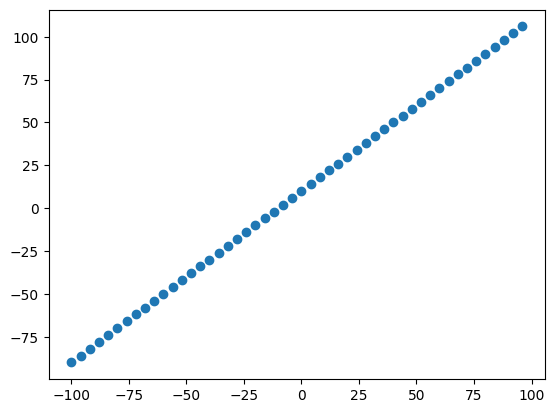

In [33]:
# Lets visualize the data.

import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets.....

* **Training set** - the model learns from this data.
* **Validation set** - The modle gets tuned on this data.
* **Test set** - the model gets evaluated on this data.

In [34]:
# Check the length of how many samples were working on.

len(X)

50

In [35]:
# Split the data into train and test sets.

X_train = X[:40]  # Give first 40 training samples.
X_test = X[40:]   # Give last 40 test samples.

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualzing the data..

NOw we've gotton our data into training and test sets... lets visualize it again!

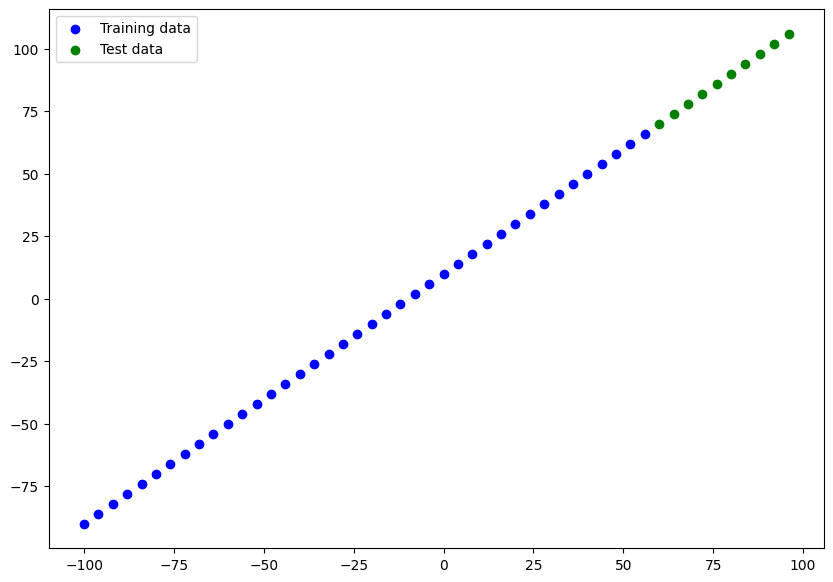

In [37]:
plt.figure(figsize= (10, 7))

# Plot training data in blue.
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

# Show the legend.
plt.legend()

In [38]:
# Let's hava a look at how to build a neural network for our data..

# 1. Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. compile the model.
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model.
# model.fit(X_train, y_train, epochs=5)

In [39]:
# Visualizing our model.

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Let's create a model which builds autmomatically by defining the input argumet.

tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
            tf.keras.layers.Dense(1, name="output_layer")

                             ], name = "model_1")

# 2. Compile the model.
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["mae"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# Look at the summary.
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params: Total number of parameters in the model. Total number our model is going to learn.
* Trainable parameters - these are the parameters(patterns) the model is going to update as it trains.
* Non -traininable parameters - this is a typicallly when you bring in alreay learn pattersn from other models during **Transfer learning**

In [71]:
# Fit the model.
model.fit(X_train, y_train, epochs=10, verbose=0)

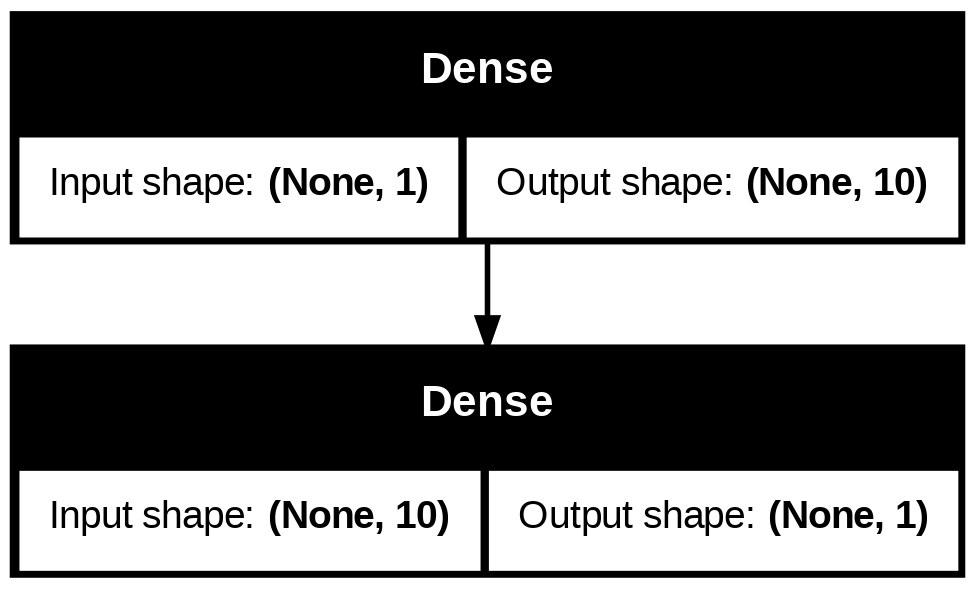

In [72]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions.

In [73]:
# Make some predictions.

y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[-18.47619 ],
       [-19.707329],
       [-20.93847 ],
       [-22.169611],
       [-23.400747],
       [-24.631891],
       [-25.86303 ],
       [-27.094162],
       [-28.325308],
       [-29.556448]], dtype=float32)

In [74]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue.
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  # Plot the predictions in red (predictions were made on the test data).
  plt.scatter(test_data, predictions, c="r", label="Predictions")

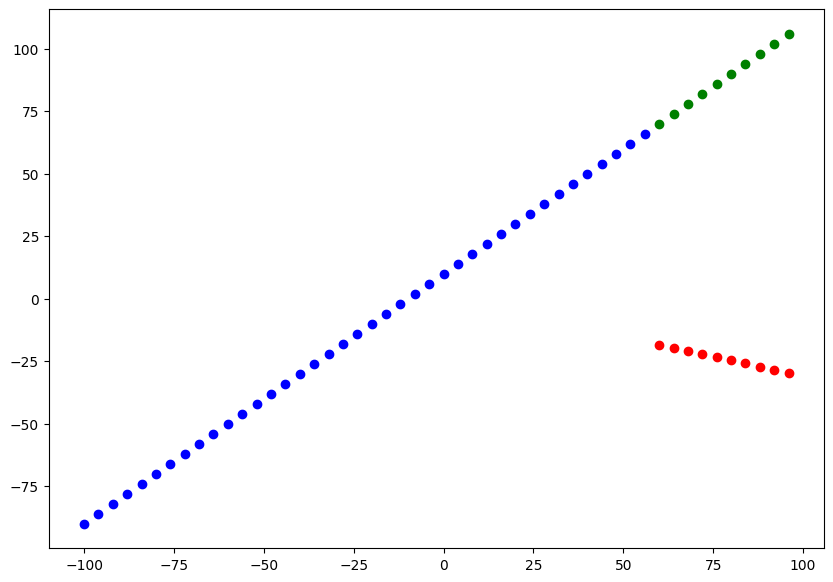

In [75]:
# Call the plot prediction function....

plot_predictions()

## Evaluating our model's predictions with regression evalution metrics.

Depending on the problem you are working on, they will be d/f evaluation matrics use to evaluate your model..

the 2 most use for regression are.

* MAE - mean absolute error. How wrong our errors are on avaerage.
* MSE - mean square error - Square the errors

In [76]:
# Evaluate the model on the test set.

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 112.0163 - mae: 112.0163


[112.01631164550781, 112.01631164550781]

In [77]:
y_preds

array([[-18.47619 ],
       [-19.707329],
       [-20.93847 ],
       [-22.169611],
       [-23.400747],
       [-24.631891],
       [-25.86303 ],
       [-27.094162],
       [-28.325308],
       [-29.556448]], dtype=float32)

In [78]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [79]:
# Calculate the mean absolute error.

tf.metrics.mean_absolute_error(y_test, y_preds)

AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_absolute_error'